Adam Whelpley

Prof. Elam

CS379

Machine Learning
Predicting fraud

In [5]:
import arff
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

The following segment of code is a conversion for the arff file to a csv.

In [3]:
path_to_directory="C:/Users/pwhel/School/Machine Learning/Unit 3/"
files = [arff for arff in os.listdir(path_to_directory) if arff.endswith(".arff")]

def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for zzzz,file in enumerate(files):
    with open(path_to_directory+file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

In [7]:
data = pd.read_csv('credit_fraud.csv')

In [8]:
print(data.columns)

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


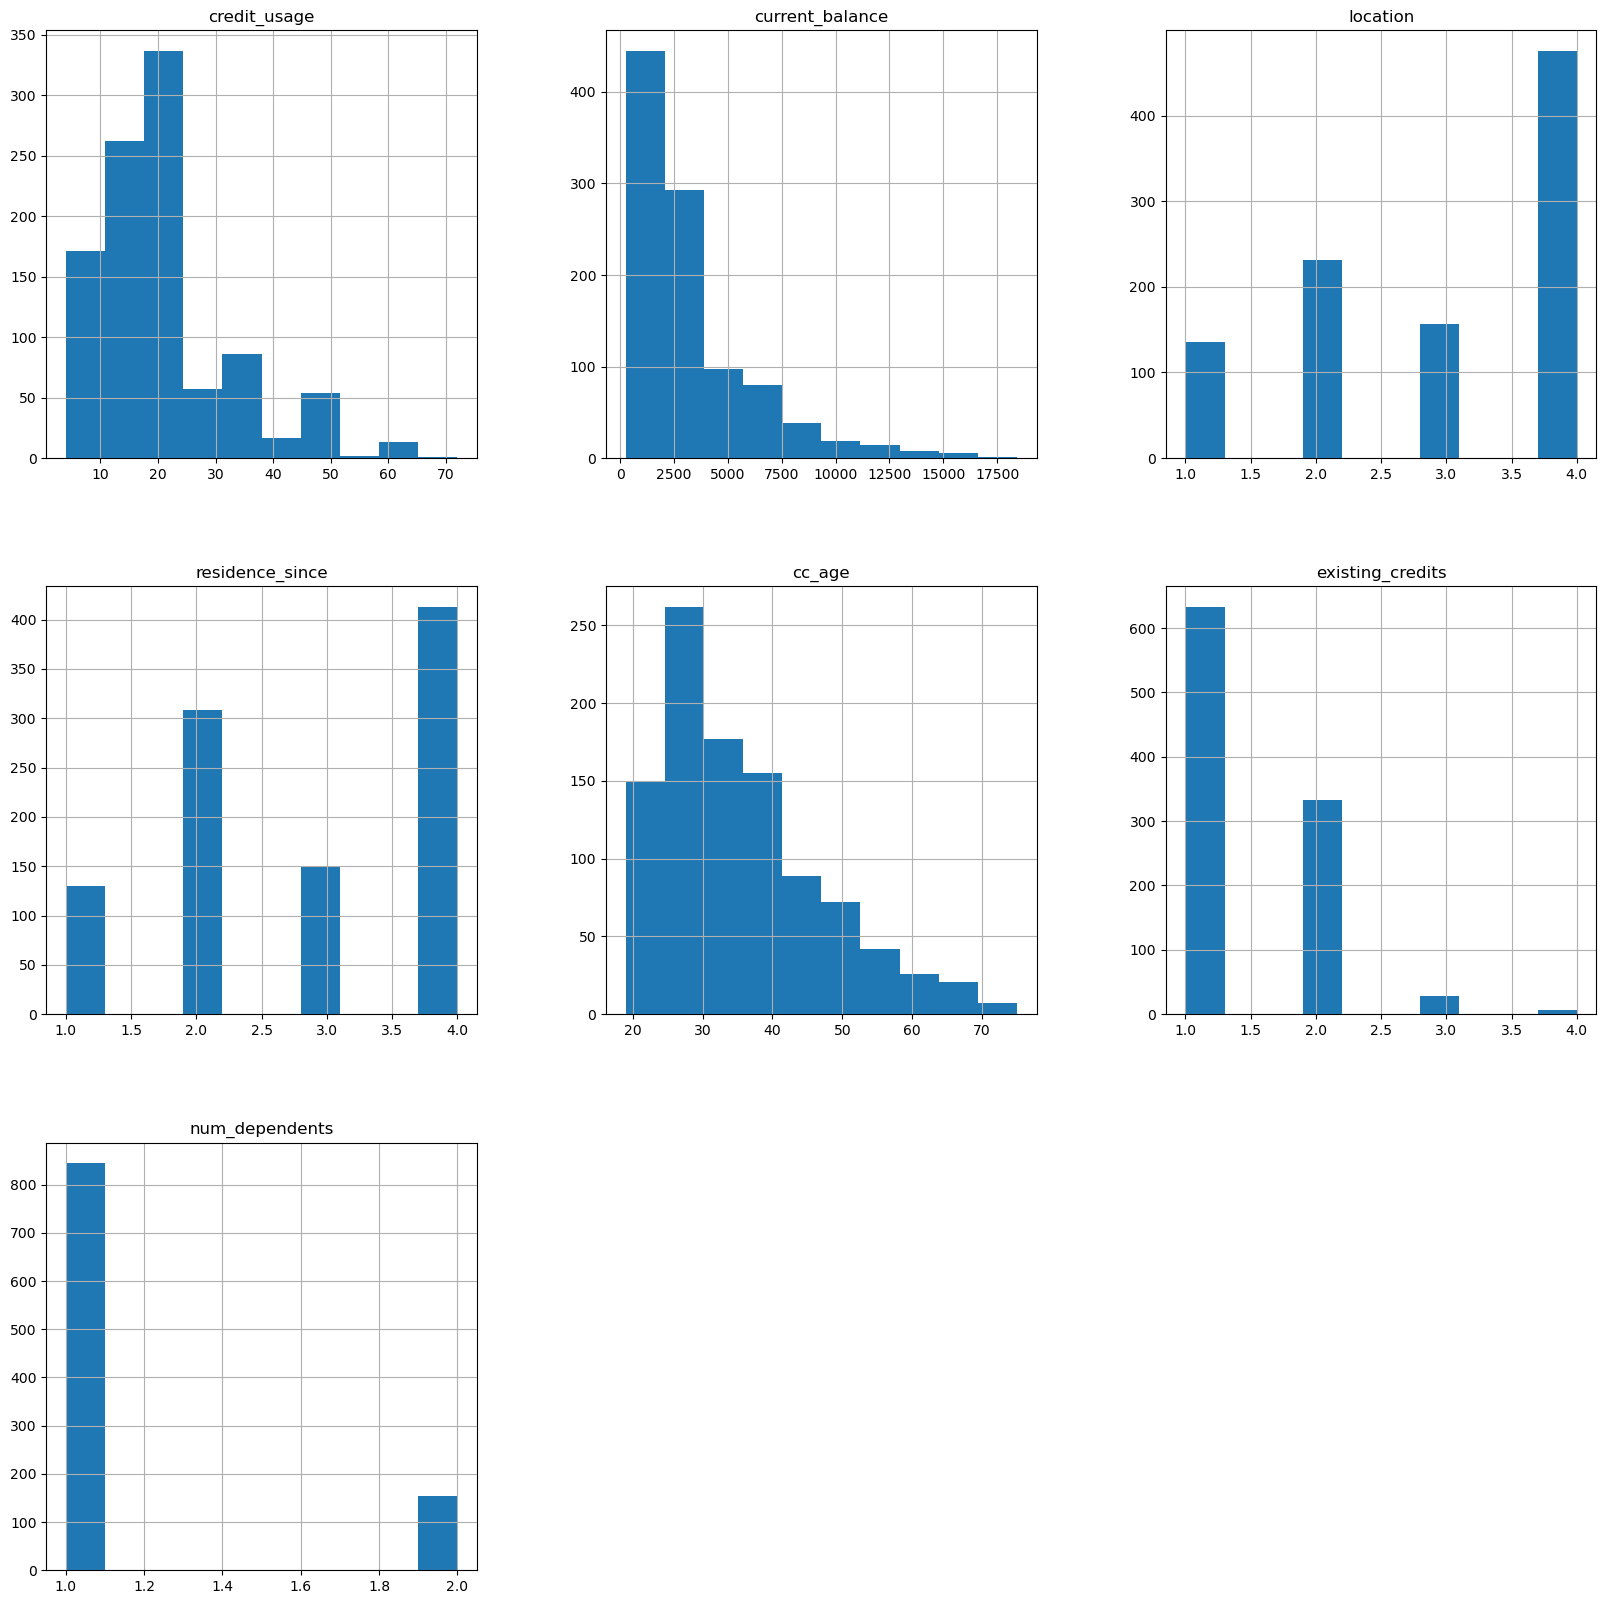

In [9]:
data.hist(figsize = (20,20))
plt.show()

In [51]:
data['class'] = data['class'].replace('good', 0)
data['class'] = data['class'].replace('bad', 1)
data

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,0
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,1
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,0
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,0
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,0
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,0
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,0
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,1


In [52]:
Fraud = data[data["class"] == 1]
Valid = data[data["class"] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
outlier_fraction

0.42857142857142855

In [53]:
# get all the columns from the data
columns = data.columns.tolist()

# filter the columns to remove data we do not want
columns = ['credit_usage','current_balance','location','residence_since','cc_age','existing_credits','num_dependents']

# store the variable we'll be predicting
target = "class"

X = data[columns]
y = data[target]

# print the shapes
print(X.shape)
print(y.shape)
X

(1000, 7)
(1000,)


,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [54]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)
        }
    

In [55]:
# fit the model

n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != y).sum()

    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 431
0.569
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       700
           1       0.35      0.50      0.41       300

    accuracy                           0.57      1000
   macro avg       0.54      0.55      0.53      1000
weighted avg       0.62      0.57      0.59      1000

Local Outlier Factor: 485
0.515
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       700
           1       0.28      0.41      0.33       300

    accuracy                           0.52      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.57      0.52      0.53      1000

